# Retail  Analysis

### Import Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_excel('D:\Projects\Online retail\Retail Analytics.xlsx')

In [3]:
df.shape

(541910, 8)

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
2,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
3,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
4,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Clean up the data

In [6]:
pd.isnull(df).sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(406830, 8)

### Add Month Column

In [10]:
df['InvoiceDate'] = df['InvoiceDate'].astype('str')

In [11]:
df['Month']=df['InvoiceDate'].str[5:7]
df['Month'] = df['Month'].astype('int')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month
0,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,12
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,1
2,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,11
3,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,10
4,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      406830 non-null  object 
 1   StockCode    406830 non-null  object 
 2   Description  406830 non-null  object 
 3   Quantity     406830 non-null  int64  
 4   InvoiceDate  406830 non-null  object 
 5   Price        406830 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      406830 non-null  object 
 8   Month        406830 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 29.5+ MB


### Add Sales Column

In [13]:
df['Sales']= df['Quantity']*df['Price']

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Sales
0,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,12,168469.6
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,1,77183.6
2,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,11,0.0
3,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,10,1008.0
4,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,5,3096.0


In [14]:
df[['Quantity','Price','Sales']].describe()

,Quantity,Price,Sales
count,406830.000000,406830.000000,406830.000000
mean,13.412248,3.460507,23.407241
std,248.623865,69.315080,427.437204
min,1.000000,0.000000,0.000000
25%,2.000000,1.250000,4.680000
50%,5.000000,1.950000,11.800000
75%,12.000000,3.750000,19.800000
max,80995.000000,38970.000000,168469.600000


### Question 1: What was the best month for sales? How much was earned that month?

In [15]:
df.groupby(['Month'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)

,Month,Sales
11,12,1284720.960
10,11,1191227.020
9,10,1104033.990
8,9,974236.392
5,6,714414.220
4,5,708938.040
7,8,674319.800
0,1,663815.700
6,7,625943.541
2,3,611036.910


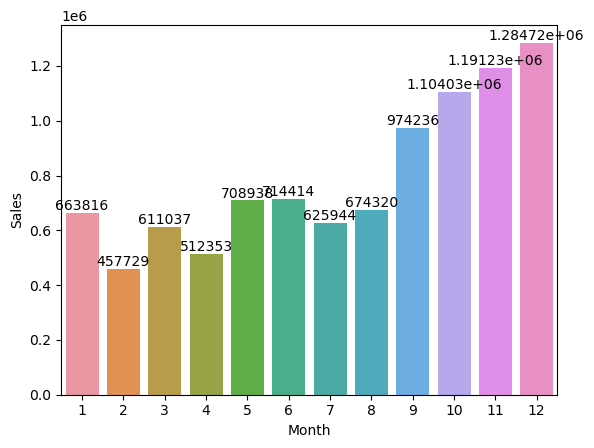

In [16]:
# plotting a bar chart for Sales vs Month

sales_mon = df.groupby(['Month'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)

ax=sns.barplot(x = 'Month',y= 'Sales' ,data = sales_mon)
for bars in ax.containers:
    ax.bar_label(bars)

### What country had the highst number of sales?

In [17]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Month', 'Sales'],
      dtype='object')

In [18]:
df.groupby(['Country'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)

,Country,Sales
35,United Kingdom,7848909.714
23,Netherlands,286231.140
10,EIRE,280806.580
14,Germany,236036.070
13,France,221353.260
0,Australia,139965.350
30,Spain,68379.640
32,Switzerland,57148.500
3,Belgium,41481.720
31,Sweden,40160.750


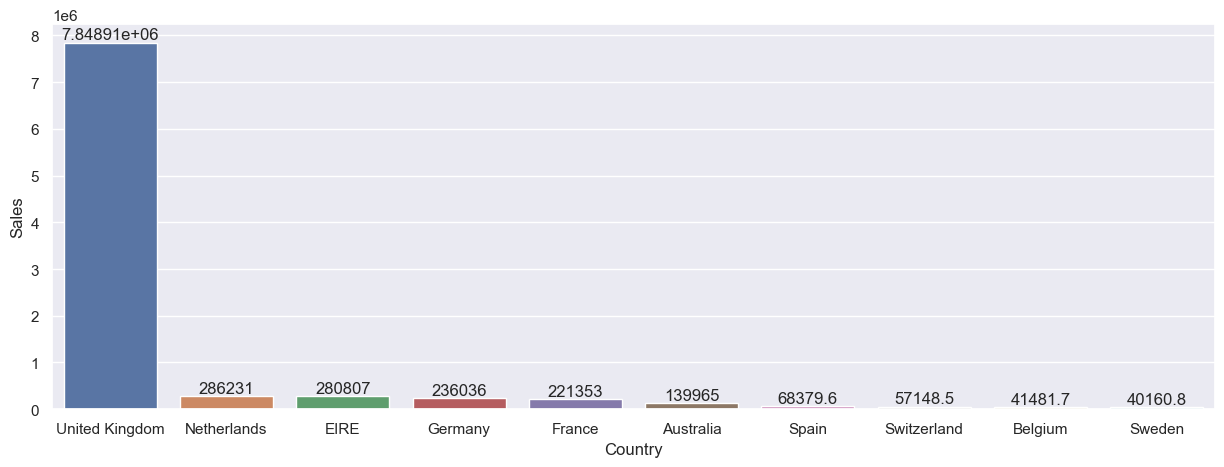

In [19]:
sales_con=df.groupby(['Country'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sc=sns.barplot(x='Country',y='Sales',data= sales_con)
for bars in sc.containers:
    sc.bar_label(bars)

### what time should we display advertisements to maximize likelihood of customer's buying product

In [20]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [21]:
df['Hour']= df['InvoiceDate'].dt.hour
df['Minute']=df['InvoiceDate'].dt.minute
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Sales,Hour,Minute
0,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,12,168469.6,9,15
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,1,77183.6,10,1
2,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,11,0.0,15,57
3,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,10,1008.0,12,26
4,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,5,3096.0,10,52


### now plotting graph between sales and hour for finding best time for advertisment

In [22]:
df.groupby(['Hour'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)

,Hour,Sales
6,12,1420069.190
4,10,1371828.181
7,13,1223854.070
5,11,1154478.590
8,14,1042654.921
9,15,1033424.640
3,9,1030095.511
10,16,490380.710
2,8,284127.990
11,17,255851.311


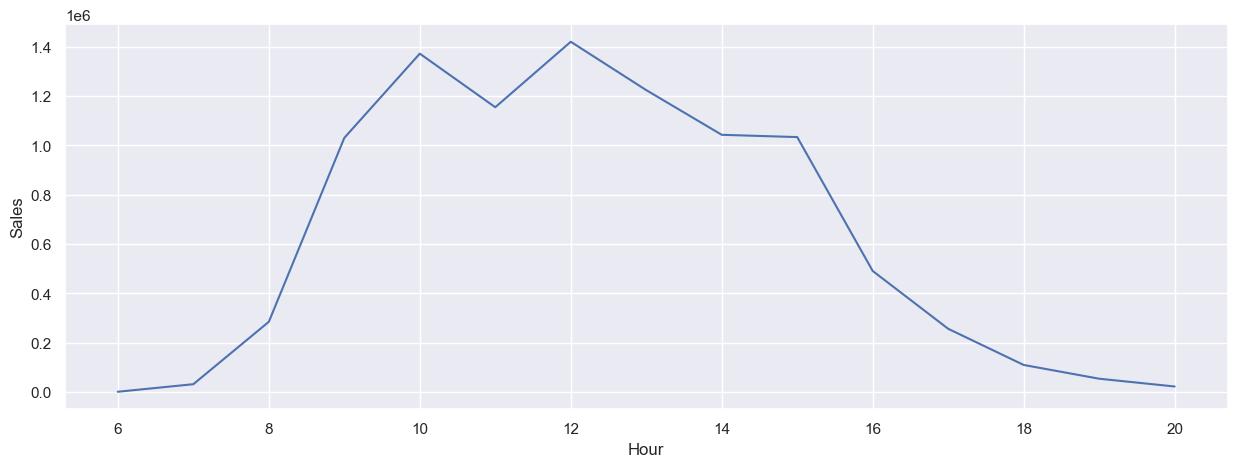

In [23]:
sales_hour=df.groupby(['Hour'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
sh=sns.lineplot(x='Hour',y='Sales',data= sales_hour)

#my recommendation is around 10 am

### what product sold the most? why do you think it sold the most?

In [24]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Sales,Hour,Minute
0,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,12,168469.6,9,15
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,1,77183.6,10,1
2,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,11,0.0,15,57
3,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,10,1008.0,12,26
4,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,5,3096.0,10,52


In [30]:
df.groupby(['Description'],as_index=False)['Quantity'].sum().sort_values(by="Quantity",ascending=False)

,Description,Quantity
2329,"PAPER CRAFT , LITTLE BIRDIE",161990
2002,MEDIUM CERAMIC TOP STORAGE JAR,152410
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55615
1771,JUMBO BAG RED RETROSPOT,47296
3716,WHITE HANGING HEART T-LIGHT HOLDER,39303
...,...,...
3402,SWEETHEART KEY CABINET,1
3562,VINTAGE BEAD PINK JEWEL STAND,1
447,BLUE LEAVES AND BEADS PHONE CHARM,1
2135,MUMMY MOUSE RED GINGHAM RIBBON,1


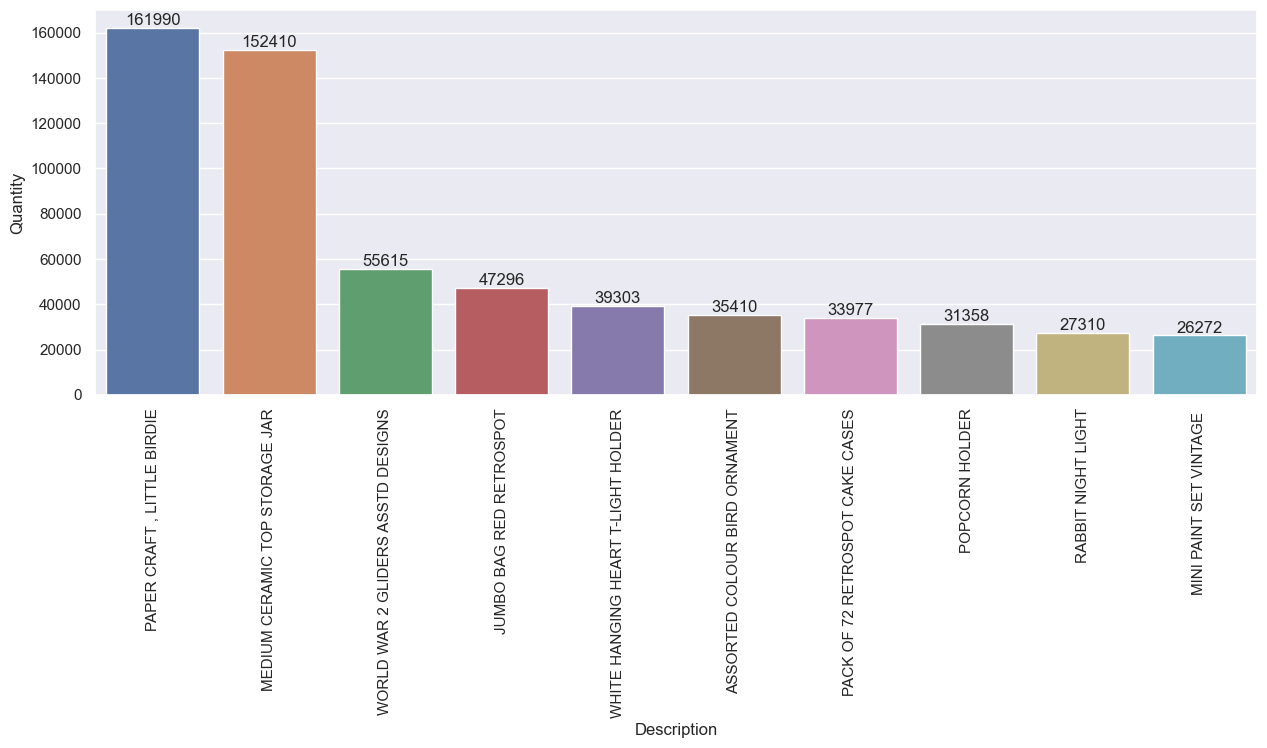

In [26]:
Max_Product=df.groupby(['Description'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sc=sns.barplot(x='Description',y='Quantity',data=Max_Product)
plt.xticks(rotation=90) 
for bars in sc.containers:
    sc.bar_label(bars)

<Axes: xlabel='Invoice'>

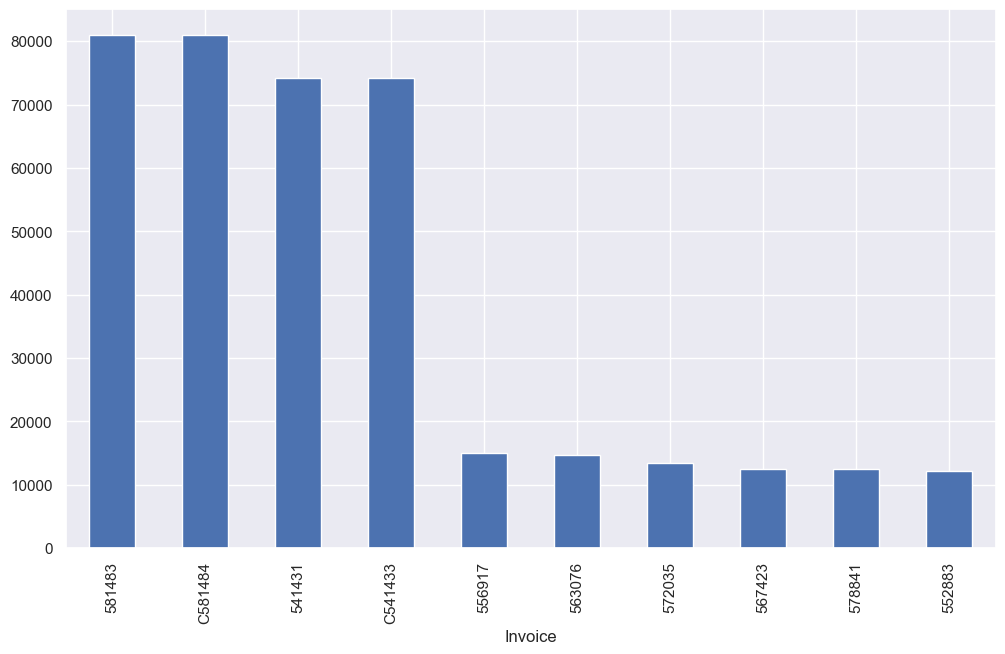

In [27]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Invoice')['Quantity'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Country', ylabel='Quantity'>

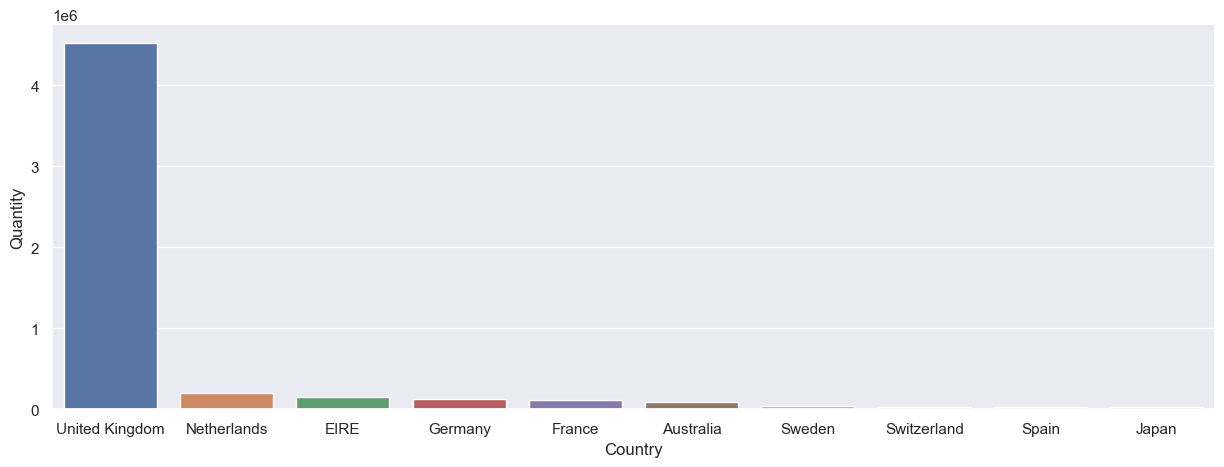

In [29]:
# total number of orders from top 10 states

sales_state = df.groupby(['Country'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'Country',y= 'Quantity')

# Conclusion